In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('clustering_elect.csv', index_col='user_id')

In [101]:
df.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158


In [102]:
df.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158


In [103]:
scale_df = StandardScaler().fit_transform(df)

In [104]:
df_scaled = df.copy()

In [105]:
for i in range(0, df.columns.size):
    df_scaled.iloc[:,i] = scale_df[:,i]

In [106]:
df_scaled.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.207052,-0.240367,-0.248761
1515915625353230683,3.723618,1.865938,-0.20593,-0.152518,4.294700,6.758762,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.211241,-0.417280,-0.342058
1515915625353234047,12.172272,-0.148511,-0.20593,-0.152518,13.907592,-0.217077,-0.017137,32.383784,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,0.100592,-0.405938,-0.047065
1515915625353236157,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,3.103082,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.251918,-0.304237,-0.309442
1515915625353294441,13.274271,5.894836,-0.20593,-0.152518,15.161448,0.364243,-0.017137,3.248273,3.103082,-0.043972,...,-0.193037,-0.195211,1.626384,-0.163982,-0.148481,-0.118888,-0.103584,1.718633,-0.384187,0.119669


In [107]:
num = len(df_scaled.columns)

In [108]:
pca0 = PCA(n_components=num)
pca_array = pca0.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_array, index = df_scaled.index,
                      columns=[f"pca{num+1}" for num in range(df_scaled.shape[1])])



In [109]:
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.816663,-0.495224,-0.375496,-0.780073,0.029689,0.800738,-0.226181,0.449369,-1.156782,-0.443086,...,-0.026346,0.043457,0.028670,0.008115,-0.001310,1.755392e-12,-7.784814e-14,-7.658475e-15,-1.390337e-14,-1.038641e-15
1515915625353230683,9.409541,-0.513531,-0.150293,-6.278019,2.590720,-5.790180,0.057344,-4.579977,3.810139,0.731441,...,-1.659492,-2.999070,-0.724692,-0.051399,-0.019400,1.612835e-13,5.047500e-13,2.034643e-13,3.902873e-15,5.685423e-14
1515915625353234047,27.709097,-1.756376,-8.827479,-3.712780,-1.805395,6.033558,-7.453126,0.831219,-1.586933,5.910922,...,5.530638,-4.679644,-2.380028,-1.422626,0.156174,-1.494322e-13,3.025906e-13,1.761170e-13,4.924859e-14,2.129050e-14
1515915625353236157,-0.848223,-0.606592,0.307467,-0.164485,-0.021369,-0.148445,-0.556309,0.229152,0.679974,-0.881814,...,-0.436463,-0.151823,-0.023546,0.006751,0.001679,2.211811e-14,6.364630e-13,2.826494e-13,-5.127979e-14,-2.433803e-14
1515915625353294441,32.074835,0.226899,-9.742368,1.725132,-1.900327,17.676111,-15.385156,4.267343,-2.305335,-6.874237,...,2.826158,1.687719,-0.999397,0.856590,-0.197537,-3.540484e-14,-6.085808e-13,2.562771e-13,6.784570e-14,-1.221854e-14


In [110]:
result = pd.DataFrame({'고윳값':pca0.explained_variance_,
                       '기여율':pca0.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(df_scaled.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,6.970289e+00,1.161698e-01,0.116170
pca2,2.740639e+00,4.567663e-02,0.161846
pca3,1.627101e+00,2.711794e-02,0.188964
pca4,1.411708e+00,2.352811e-02,0.212492
pca5,1.294859e+00,2.158066e-02,0.234073
pca6,1.263692e+00,2.106121e-02,0.255134
pca7,1.241438e+00,2.069032e-02,0.275825
pca8,1.215612e+00,2.025990e-02,0.296085
pca9,1.198884e+00,1.998110e-02,0.316066
pca10,1.158538e+00,1.930868e-02,0.335374


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [60] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[38]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


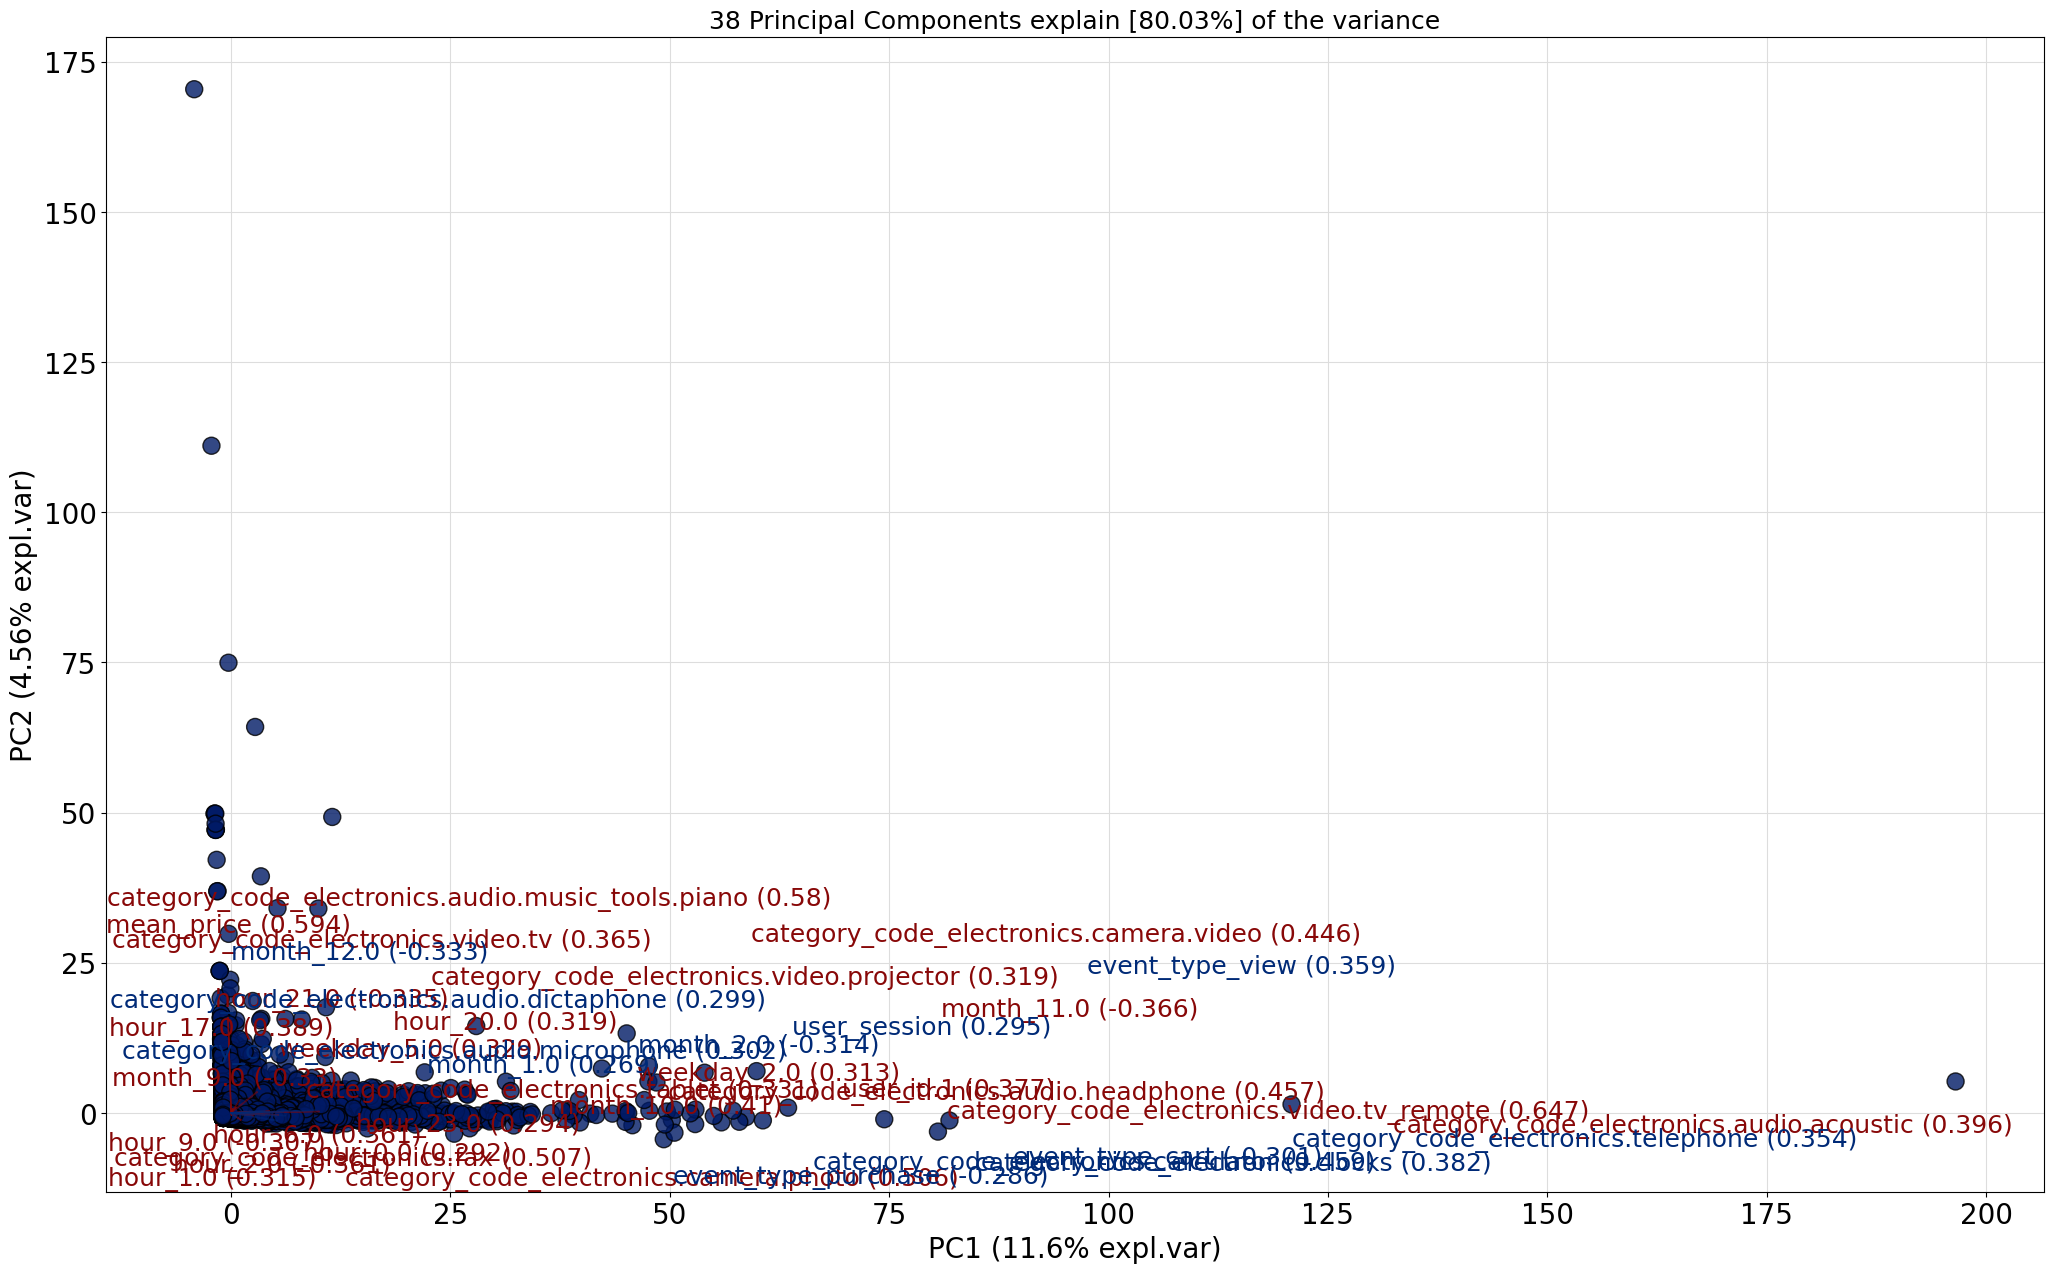

In [111]:
pca0 = PCA(n_components=38)
pca_array = pca0.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_array, index = df_scaled.index, columns=[f"pca{num+1}" for num in range(38)])

model = pca(n_components=38)
results = model.fit_transform(df_scaled)
fig, ax = model.biplot(n_feat = 38, legend = False)

In [112]:
x = [] 
y = [] 

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)


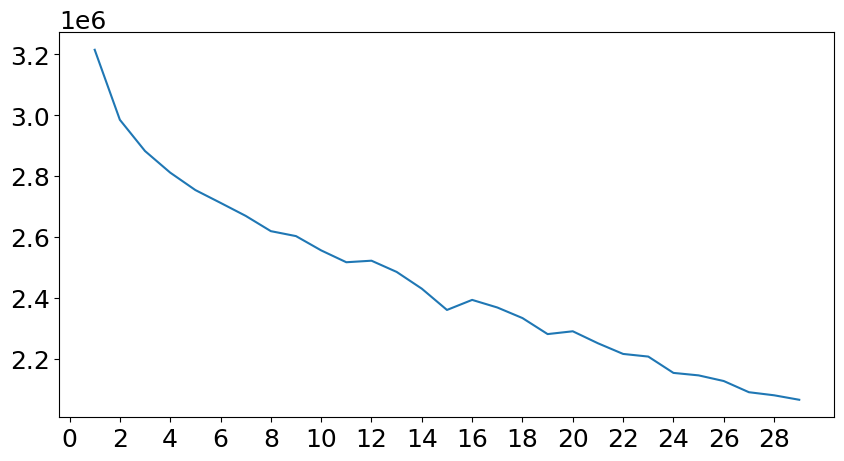

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(range(0,30,2))
plt.show()

In [114]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)
pca_df['labels'] = kmeans.predict(pca_df)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,labels
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.816669,-0.496173,-0.364552,-0.773658,-0.004681,0.799896,-0.210003,0.460863,-1.114544,-0.446750,...,-0.368563,-0.491488,-0.619615,-0.401155,-0.280285,0.846435,-0.592739,-0.270364,-0.166245,3
1515915625353230683,9.409581,-0.509080,-0.162249,-6.315404,2.838118,-5.658231,-0.003684,-4.627619,3.658819,0.547241,...,0.600323,-2.363301,-3.879137,3.627385,-1.074278,-1.512597,-0.702166,-0.084910,-0.058354,2
1515915625353234047,27.708869,-1.785364,-8.724200,-3.535061,-2.049572,5.658616,-7.591250,0.890800,-1.745663,6.052682,...,-1.331067,9.829737,1.872825,-3.877913,8.017954,-6.382784,-2.602076,0.861579,3.391806,2
1515915625353236157,-0.848209,-0.608624,0.310077,-0.145115,-0.110769,-0.179795,-0.601155,0.260590,0.672068,-0.827166,...,-0.599080,-0.050397,0.558289,0.457790,0.363987,0.634261,-0.725543,0.383729,0.315913,3
1515915625353294441,32.074300,0.188152,-9.721918,1.923149,-1.875260,17.109247,-15.378610,4.232851,-3.026733,-6.690309,...,7.193637,10.599079,14.662522,-13.988774,5.259348,-3.151286,-1.358976,10.024230,7.199910,0


In [115]:
pca_df.groupby('labels')['pca1'].agg('count')

labels
0       60
1     3233
2      845
3    56685
4     6056
Name: pca1, dtype: int64

<Axes: xlabel='pca1', ylabel='pca2'>

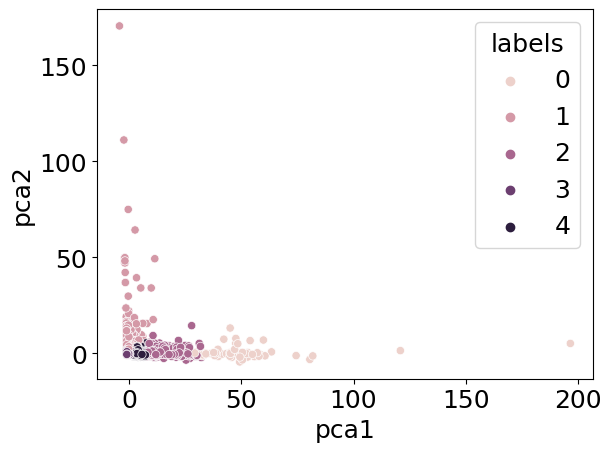

In [116]:
sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df)

In [117]:
dfc = df.copy()

In [118]:
dfc['labels'] = pca_df['labels']

In [119]:
dfc.groupby('labels').agg('mean')

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
labels,,,,,,,,,,,,,,,,,,,,,
0,52.583333,14.133333,4.033333,2.333333,46.216667,22.016667,0.983333,1.016667,0.016667,0.000000,...,3.616667,2.716667,3.466667,2.183333,1.433333,0.800000,0.266667,271.431000,74.334667,119.618454
1,1.349521,1.094030,0.011444,0.005568,1.332509,0.040210,0.000000,0.000309,0.000000,0.023198,...,0.084132,0.081349,0.067430,0.068667,0.047634,0.029694,0.024126,1370.697792,1222.491763,1270.731745
2,15.353846,2.907692,1.555030,1.517160,12.281657,3.536095,0.035503,0.467456,0.175148,0.065089,...,1.188166,0.978698,0.747929,0.685207,0.330178,0.269822,0.228402,200.919716,91.268959,127.702374
3,1.287836,1.065608,0.011379,0.001182,1.275276,0.250684,0.002611,0.088277,0.031578,0.003775,...,0.077269,0.075681,0.068695,0.055941,0.039781,0.025933,0.021028,122.657317,115.345131,118.903775
4,5.136889,1.567701,0.531539,0.381605,4.223745,1.044419,0.010238,0.254458,0.055978,0.011559,...,0.314564,0.339498,0.297226,0.235634,0.162979,0.090324,0.073481,156.686271,95.902731,120.352079


# Hour 제거

In [120]:
df_1 = df[df.columns[~df.columns.str.contains('hour')]]


In [121]:
scale_df_1 = StandardScaler().fit_transform(df_1)

In [122]:
df_scaled_1 = df_1.copy()

In [123]:
for i in range(0, df_scaled_1.columns.size):
    df_scaled_1.iloc[:,i] = scale_df_1[:,i]

In [124]:
df_scaled_1.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.277569,-0.267253,-0.266980,0.781891,-0.280297,-0.271315,-0.277838,-0.207052,-0.240367,-0.248761
1515915625353230683,3.723618,1.865938,-0.20593,-0.152518,4.294700,6.758762,-0.017137,-0.179435,-0.109423,-0.043972,...,7.787389,-0.267253,3.683324,-0.280266,-0.280297,-0.271315,-0.277838,-0.211241,-0.417280,-0.342058
1515915625353234047,12.172272,-0.148511,-0.20593,-0.152518,13.907592,-0.217077,-0.017137,32.383784,-0.109423,-0.043972,...,1.738671,4.666399,-0.266980,14.589930,6.202838,8.107459,-0.277838,0.100592,-0.405938,-0.047065
1515915625353236157,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,3.103082,-0.043972,...,-0.277569,-0.267253,-0.266980,0.781891,-0.280297,-0.271315,-0.277838,-0.251918,-0.304237,-0.309442
1515915625353294441,13.274271,5.894836,-0.20593,-0.152518,15.161448,0.364243,-0.017137,3.248273,3.103082,-0.043972,...,-0.277569,3.679669,15.534239,2.906205,0.800226,14.391539,-0.277838,1.718633,-0.384187,0.119669


In [125]:
df_scaled_1.describe()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
count,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,...,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04
mean,-1.614894e-17,-7.776990e-17,-3.293534e-17,-2.826065e-17,5.949609e-17,5.715875e-17,-7.861984e-18,-1.025245e-17,-1.872533e-17,8.818171e-18,...,-4.334715e-17,-3.314782e-17,3.399777e-18,3.697257e-17,4.972174e-17,-3.187291e-17,9.689364e-17,-1.593645e-18,-6.310836e-17,-2.677324e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-7.207214e-01,-2.170769e-01,-1.713725e-02,-1.794345e-01,-1.094228e-01,-4.397197e-02,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-3.484004e-01,-4.415870e-01,-4.399340e-01
25%,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-3.027696e-01,-2.170769e-01,-1.713725e-02,-1.794345e-01,-1.094228e-01,-4.397197e-02,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-2.968582e-01,-3.743096e-01,-3.720193e-01
50%,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-3.027696e-01,-2.170769e-01,-1.713725e-02,-1.794345e-01,-1.094228e-01,-4.397197e-02,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-2.009742e-01,-2.633699e-01,-2.526310e-01
75%,5.028932e-02,-1.485106e-01,-2.059301e-01,-1.525177e-01,1.151822e-01,-2.170769e-01,-1.713725e-02,-1.794345e-01,-1.094228e-01,-4.397197e-02,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,3.167604e-02,4.200051e-02,5.158161e-02
max,6.653753e+01,1.660435e+02,6.036538e+01,3.992174e+01,7.576446e+01,1.061645e+02,2.261408e+02,8.722710e+01,1.091157e+02,7.098987e+01,...,4.912029e+01,5.400292e+01,5.701244e+01,4.114385e+01,5.374583e+01,4.895398e+01,6.175524e+01,7.930107e+01,1.129454e+02,1.072858e+02


In [126]:
df_scaled_1.columns

Index(['user_id.1', 'user_session', 'event_type_cart', 'event_type_purchase',
       'event_type_view', 'category_code_electronics.audio.acoustic',
       'category_code_electronics.audio.dictaphone',
       'category_code_electronics.audio.headphone',
       'category_code_electronics.audio.microphone',
       'category_code_electronics.audio.music_tools.piano',
       'category_code_electronics.calculator',
       'category_code_electronics.camera.photo',
       'category_code_electronics.camera.video',
       'category_code_electronics.clocks', 'category_code_electronics.fax',
       'category_code_electronics.tablet',
       'category_code_electronics.telephone',
       'category_code_electronics.video.projector',
       'category_code_electronics.video.tv',
       'category_code_electronics.video.tv_remote', 'month_1.0', 'month_2.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
     

In [127]:
num = len(df_scaled_1.columns)
pca1 = PCA(n_components=num)
pca_array = pca1.fit_transform(df_scaled_1)
pca_df = pd.DataFrame(pca_array, index = df_scaled_1.index,
                      columns=[f"pca{num+1}" for num in range(df_scaled_1.shape[1])])

result = pd.DataFrame({'고윳값':pca1.explained_variance_,
                       '기여율':pca1.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(df_scaled_1.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,5.603471e+00,1.556496e-01,0.155650
pca2,2.739107e+00,7.608517e-02,0.231735
pca3,1.463782e+00,4.066000e-02,0.272395
pca4,1.226606e+00,3.407187e-02,0.306467
pca5,1.210633e+00,3.362820e-02,0.340095
pca6,1.149633e+00,3.193378e-02,0.372029
pca7,1.129918e+00,3.138614e-02,0.403415
pca8,1.114544e+00,3.095908e-02,0.434374
pca9,1.077844e+00,2.993967e-02,0.464314
pca10,1.046987e+00,2.908254e-02,0.493396


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [36] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[22]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


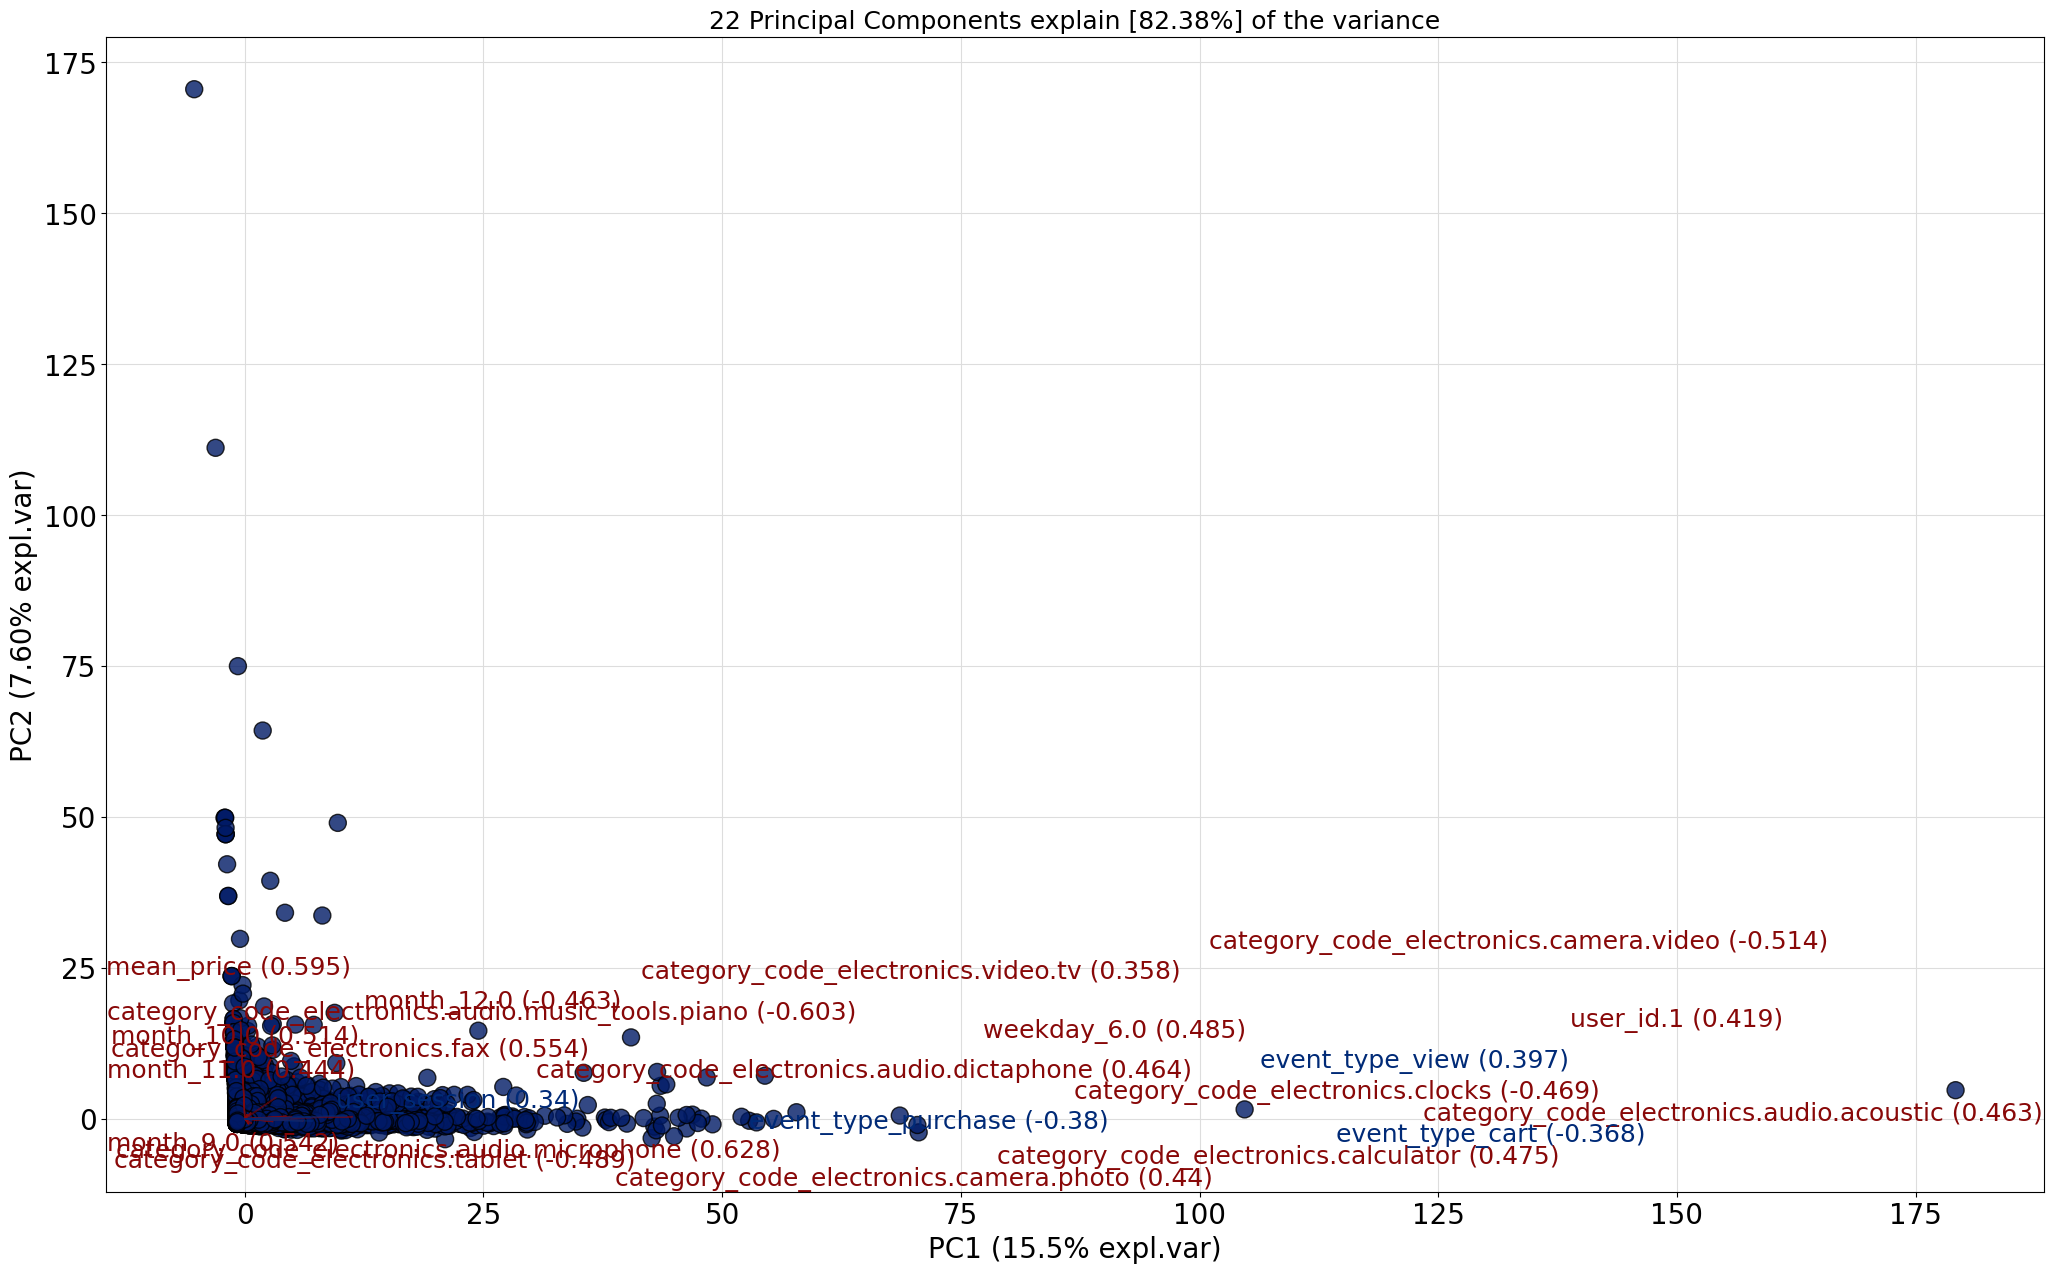

In [128]:
pca1 = PCA(n_components=22)
pca_array = pca1.fit_transform(df_scaled_1)
pca_df = pd.DataFrame(pca_array, index = df_scaled_1.index, columns=[f"pca{num+1}" for num in range(22)])

model = pca(n_components=22)
results = model.fit_transform(df_scaled_1)
fig, ax = model.biplot(n_feat = 22, legend = False)

In [129]:
x = []
y = [] 

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)


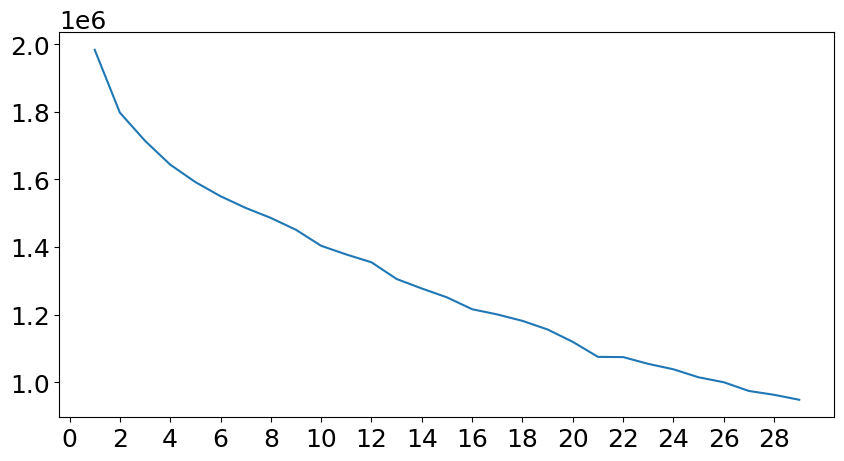

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(range(0,30,2))
plt.show()

In [131]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
pca_df['labels'] = kmeans.predict(pca_df)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,labels
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.765448,-0.495674,-0.128479,1.131042,-0.623287,1.242540,-0.443803,-0.397234,0.201541,0.522200,...,0.414914,-0.488291,-0.062414,0.376740,0.571815,-0.621694,0.108380,-0.072784,0.339520,1
1515915625353230683,8.232590,-0.345646,2.796340,3.344956,7.061449,-0.202294,3.056211,2.602588,-0.019329,-0.892131,...,0.011275,-0.156005,0.876438,0.553984,0.345183,0.130629,1.791098,-0.564389,-0.439321,0
1515915625353234047,23.641052,-1.506020,-1.120410,1.749459,-7.067281,-1.803367,6.763346,6.053060,2.206433,-1.787368,...,12.310574,9.422167,-5.337331,-12.838687,-0.770312,1.098485,-4.448457,-6.358960,1.794660,2
1515915625353236157,-0.778524,-0.611710,-0.146222,-0.350210,0.010987,0.487864,-0.715205,1.580104,-0.417162,0.647340,...,-0.309514,-0.180237,-0.468650,0.234602,-0.293052,0.795311,-0.667585,0.477564,2.091985,1
1515915625353294441,28.012119,0.395131,-2.321184,3.457038,-15.415763,6.016533,4.855105,8.301398,5.709918,-5.020595,...,1.834485,3.401330,-1.512146,0.192434,3.582951,1.715002,-1.477666,-10.635888,7.952322,2


In [132]:
pca_df.groupby('labels')['pca1'].agg('count')

labels
0     3423
1    60013
2      145
3     3298
Name: pca1, dtype: int64

<Axes: xlabel='pca1', ylabel='pca2'>

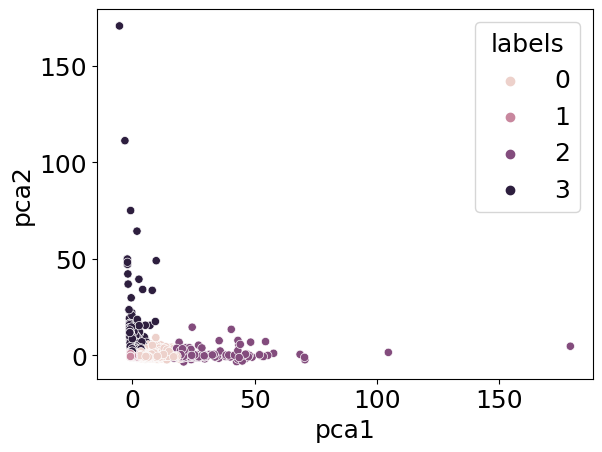

In [133]:
sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df)

In [134]:
dfc1 = df_1.copy()

In [135]:
dfc1['labels'] = pca_df['labels']

In [136]:
dfc1.groupby('labels').agg('mean')

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
labels,,,,,,,,,,,,,,,,,,,,,
0,8.188431,1.971662,0.926380,0.859480,6.402571,1.679229,0.017528,0.379784,0.074496,0.028046,...,1.209758,1.212971,1.278995,1.192813,1.061058,1.028338,1.204499,159.632130,88.752174,114.704897
1,1.440255,1.085365,0.029810,0.008665,1.401780,0.285871,0.002999,0.093430,0.033076,0.003966,...,0.211454,0.204406,0.199857,0.204006,0.207072,0.206938,0.206522,124.103318,114.099098,118.789707
2,37.951724,8.434483,3.075862,2.248276,32.627586,13.400000,0.406897,0.648276,0.262069,0.000000,...,5.937931,7.068966,7.103448,4.889655,4.344828,4.986207,3.620690,241.761241,80.370276,123.457345
3,1.405700,1.101273,0.015464,0.009096,1.381140,0.038508,0.000000,0.000303,0.000000,0.024257,...,0.218921,0.203153,0.205579,0.185567,0.200121,0.201031,0.191328,1361.419797,1209.867307,1259.190761


# Category 제거

In [137]:
df_2 = df_1[df_1.columns[~df_1.columns.str.contains('category')]]

In [138]:
scale_df_2 = StandardScaler().fit_transform(df_2)

In [139]:
df_scaled_2 = df_2.copy()

In [140]:
for i in range(0, df_scaled_2.columns.size):
    df_scaled_2.iloc[:,i] = scale_df_2[:,i]

In [141]:
df_scaled_2.describe()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,month_1.0,month_2.0,month_9.0,month_10.0,month_11.0,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
count,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,...,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04,6.687900e+04
mean,-1.614894e-17,-7.776990e-17,-3.293534e-17,-2.826065e-17,5.949609e-17,-3.569766e-17,-3.399777e-17,3.442274e-17,-5.864615e-17,2.379844e-17,...,-4.334715e-17,-3.314782e-17,3.399777e-18,3.697257e-17,4.972174e-17,-3.187291e-17,9.689364e-17,-1.593645e-18,-6.310836e-17,-2.677324e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-7.207214e-01,-2.461134e-01,-2.627111e-01,-1.336453e-01,-2.811897e-01,-3.074285e-01,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-3.484004e-01,-4.415870e-01,-4.399340e-01
25%,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-3.027696e-01,-2.461134e-01,-2.627111e-01,-1.336453e-01,-2.811897e-01,-3.074285e-01,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-2.968582e-01,-3.743096e-01,-3.720193e-01
50%,-3.170435e-01,-1.485106e-01,-2.059301e-01,-1.525177e-01,-3.027696e-01,-2.461134e-01,-2.627111e-01,-1.336453e-01,-2.811897e-01,-3.074285e-01,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,-2.009742e-01,-2.633699e-01,-2.526310e-01
75%,5.028932e-02,-1.485106e-01,-2.059301e-01,-1.525177e-01,1.151822e-01,-2.461134e-01,-2.627111e-01,-1.336453e-01,-2.811897e-01,-3.074285e-01,...,-2.775687e-01,-2.672533e-01,-2.669803e-01,-2.802656e-01,-2.802970e-01,-2.713151e-01,-2.778381e-01,3.167604e-02,4.200051e-02,5.158161e-02
max,6.653753e+01,1.660435e+02,6.036538e+01,3.992174e+01,7.576446e+01,9.010461e+01,4.593839e+01,5.799282e+01,5.511227e+01,4.268181e+01,...,4.912029e+01,5.400292e+01,5.701244e+01,4.114385e+01,5.374583e+01,4.895398e+01,6.175524e+01,7.930107e+01,1.129454e+02,1.072858e+02


In [142]:
df_2.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,month_1.0,month_2.0,month_9.0,month_10.0,month_11.0,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0,...,8.0,0.0,4.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,9.0,9.0,2.0,15.0,0.0,...,2.0,5.0,0.0,14.0,6.0,8.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,0.0,22.0,0.0,15.0,0.0,...,0.0,4.0,16.0,3.0,1.0,14.0,0.0,1106.16,22.46,222.138158


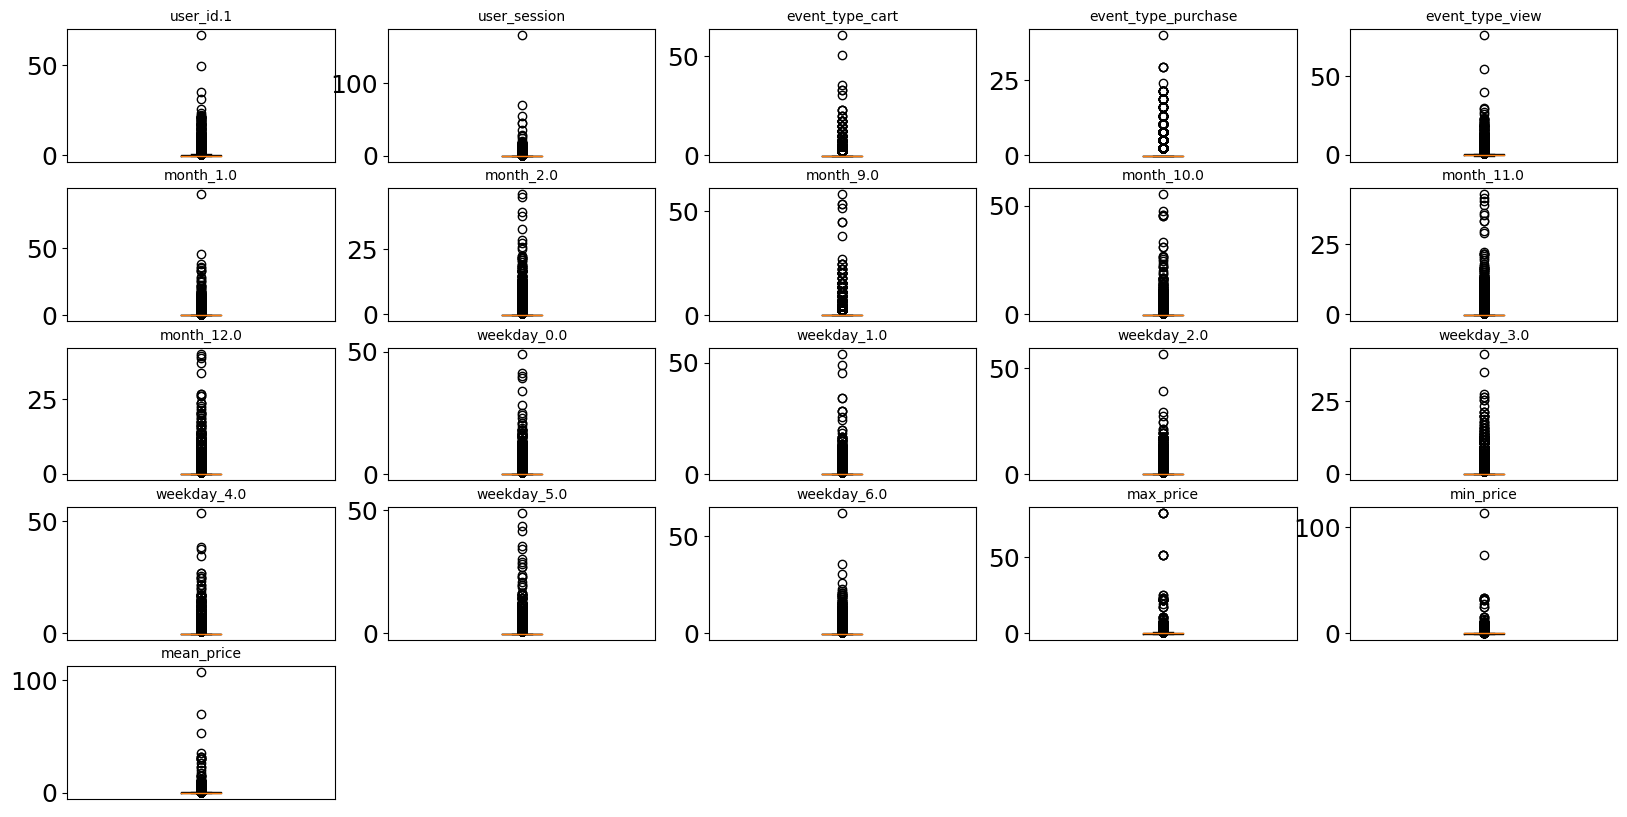

In [143]:
plt.figure(figsize=(20,10))
for idx, col in enumerate(df_scaled_2.columns):
    plt.subplot(5,5,idx+1)
    plt.boxplot(df_scaled_2[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()

In [144]:
num = len(df_scaled_2.columns)
pca2 = PCA(n_components=num)
pca_array = pca2.fit_transform(df_scaled_2)
pca_df = pd.DataFrame(pca_array, index = df_scaled_2.index,
                      columns=[f"pca{num+1}" for num in range(df_scaled_2.shape[1])])

result = pd.DataFrame({'고윳값':pca2.explained_variance_,
                       '기여율':pca2.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(df_scaled_2.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,4.853314e+00,2.311067e-01,0.231107
pca2,2.680696e+00,1.276503e-01,0.358757
pca3,1.270795e+00,6.051316e-02,0.419270
pca4,1.141620e+00,5.436203e-02,0.473632
pca5,1.097572e+00,5.226455e-02,0.525897
pca6,1.065014e+00,5.071420e-02,0.576611
pca7,1.059520e+00,5.045256e-02,0.627063
pca8,1.035230e+00,4.929594e-02,0.676359
pca9,1.010325e+00,4.811001e-02,0.724469
pca10,9.434835e-01,4.492711e-02,0.769397


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [21] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


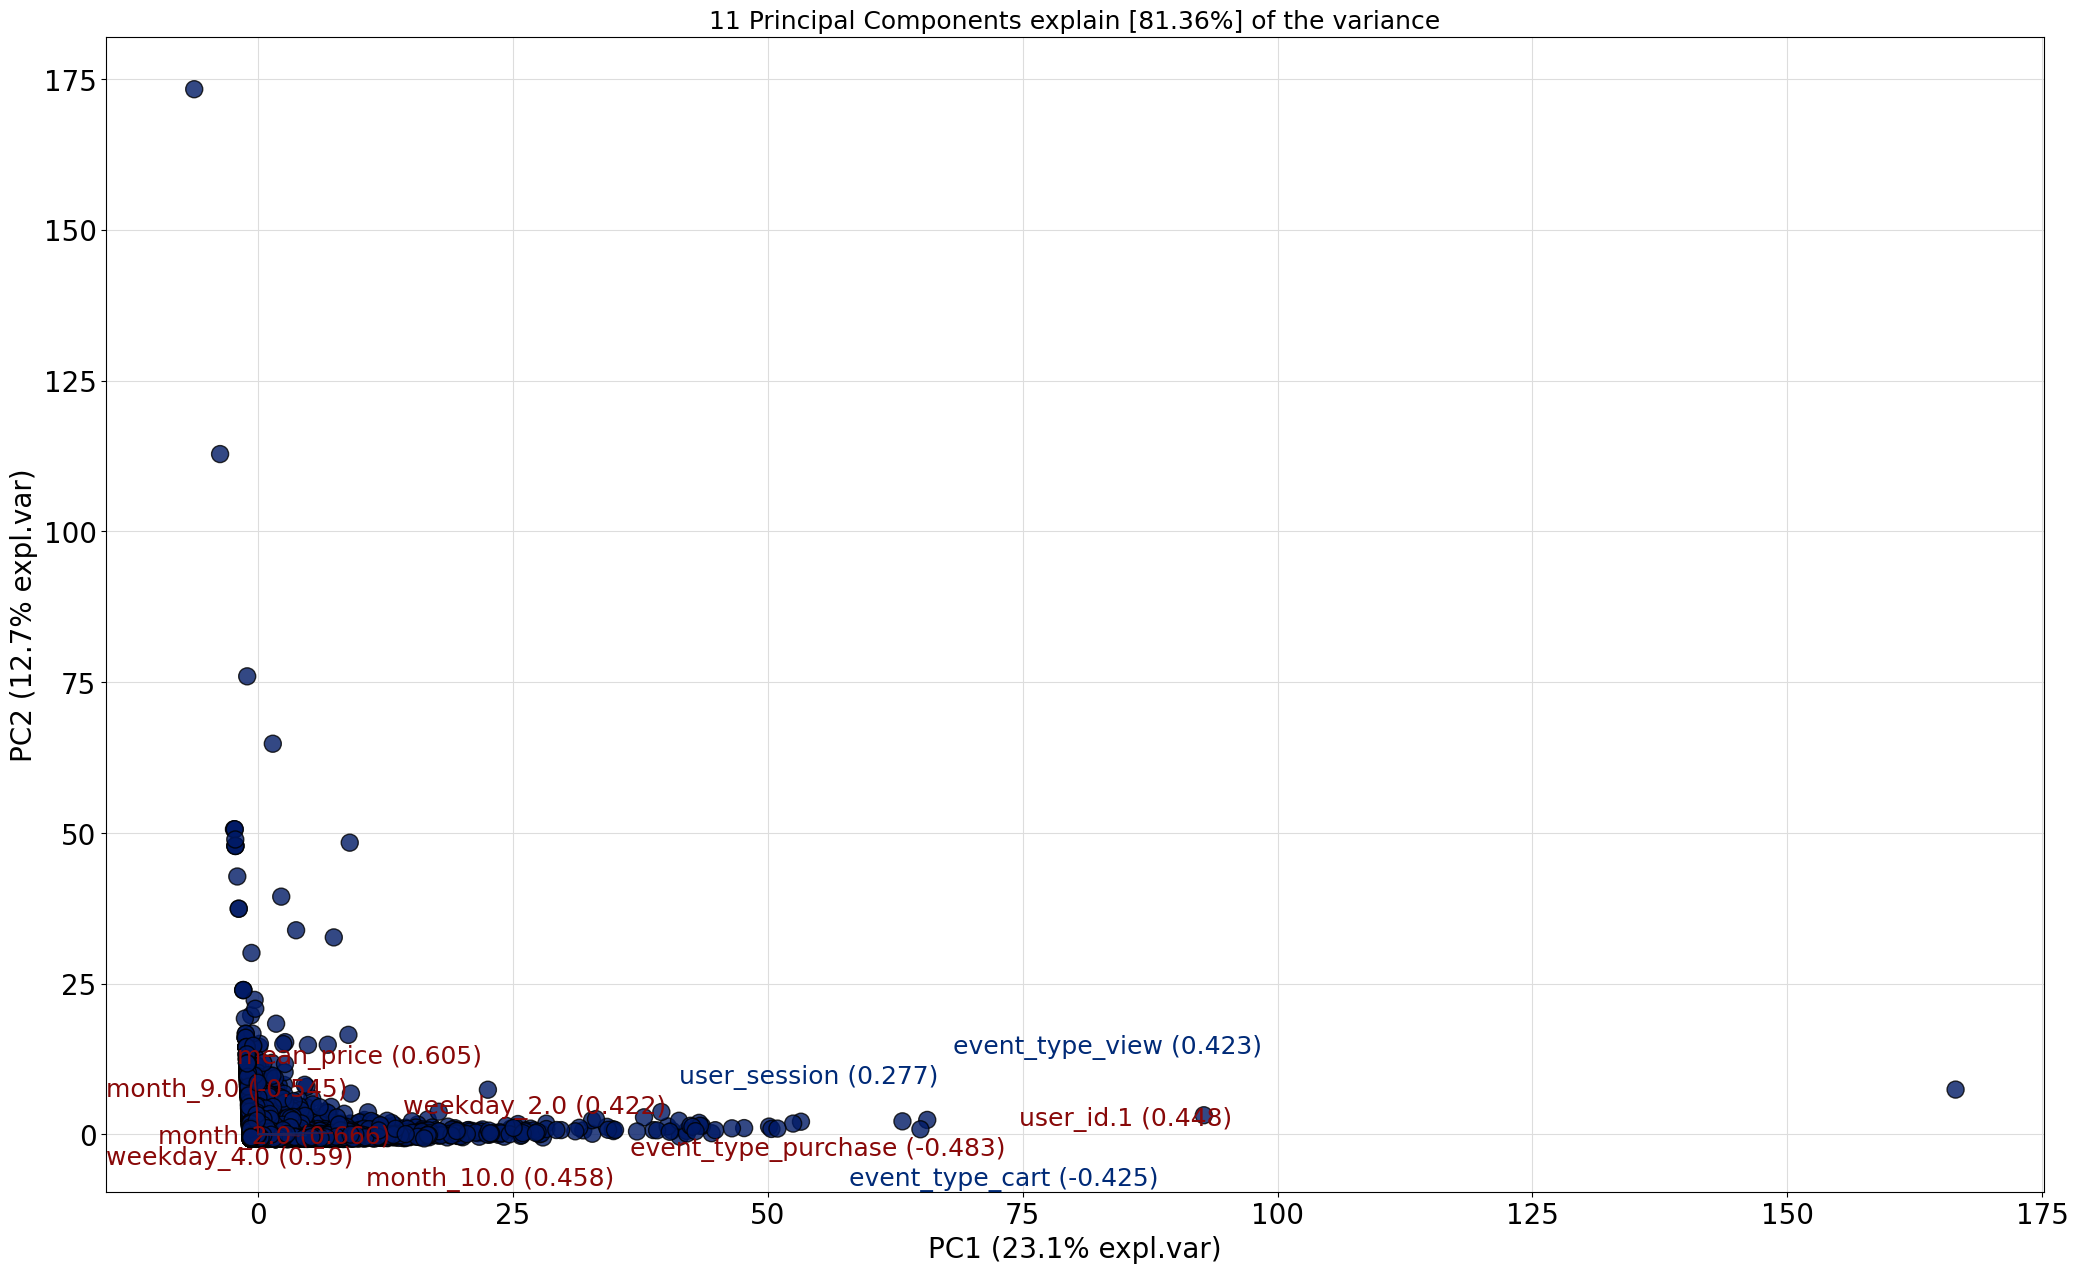

In [145]:
from pca import pca
import seaborn as sns

pca2 = PCA(n_components=11)
pca_array = pca2.fit_transform(df_scaled_2)
pca_df = pd.DataFrame(pca_array, index = df_scaled_2.index, columns=[f"pca{num+1}" for num in range(11)])

model = pca(n_components=11)
results = model.fit_transform(df_scaled_2)
fig, ax = model.biplot(n_feat = 11, legend = False)

In [146]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)


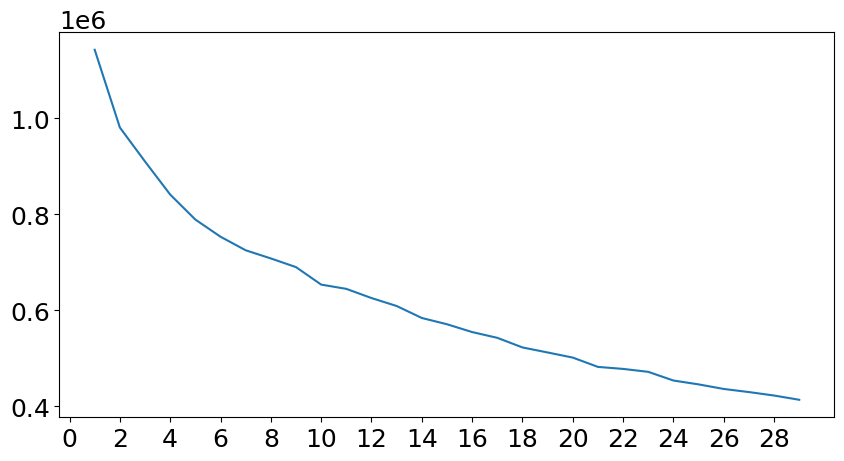

In [147]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(range(0,30,2))
plt.show()

In [148]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)
pca_df['labels'] = kmeans.predict(pca_df)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,labels
user_id,,,,,,,,,,,,
1515915625353226922,-0.670269,-0.429366,-0.187417,0.433973,-0.769664,-0.013841,0.340880,-0.069479,0.165876,-0.258424,-0.352853,0
1515915625353230683,7.342713,-0.189172,-0.890386,5.748121,6.912771,2.041477,-1.881328,1.442621,-0.205524,0.688018,-4.914395,3
1515915625353234047,21.778504,0.592767,7.403902,3.228041,-12.639191,4.899994,-0.562631,-0.055880,-1.191990,-4.812742,-3.040236,1
1515915625353236157,-0.665969,-0.524630,-0.062184,-0.224665,-0.407241,0.622104,0.483381,-0.029342,0.182708,-0.570896,-0.328199,0
1515915625353294441,25.491037,1.724758,7.105082,-0.681284,-10.550763,13.228500,3.054446,-7.359244,-0.301805,7.926701,-5.897240,1


In [149]:
kmeans = KMeans(n_clusters=5)

In [150]:
kmeans.fit(pca_df)

KMeans(n_clusters=5)

In [151]:
pca_df['labels'] = kmeans.predict(pca_df)

In [152]:
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,labels
user_id,,,,,,,,,,,,
1515915625353226922,-0.670269,-0.429366,-0.187417,0.433973,-0.769664,-0.013841,0.340880,-0.069479,0.165876,-0.258424,-0.352853,0
1515915625353230683,7.342713,-0.189172,-0.890386,5.748121,6.912771,2.041477,-1.881328,1.442621,-0.205524,0.688018,-4.914395,4
1515915625353234047,21.778504,0.592767,7.403902,3.228041,-12.639191,4.899994,-0.562631,-0.055880,-1.191990,-4.812742,-3.040236,2
1515915625353236157,-0.665969,-0.524630,-0.062184,-0.224665,-0.407241,0.622104,0.483381,-0.029342,0.182708,-0.570896,-0.328199,0
1515915625353294441,25.491037,1.724758,7.105082,-0.681284,-10.550763,13.228500,3.054446,-7.359244,-0.301805,7.926701,-5.897240,2


In [153]:
pca_df.groupby('labels')['pca1'].agg('count')

labels
0    59640
1       18
2       97
3     3857
4     3267
Name: pca1, dtype: int64

<Axes: xlabel='pca1', ylabel='pca2'>

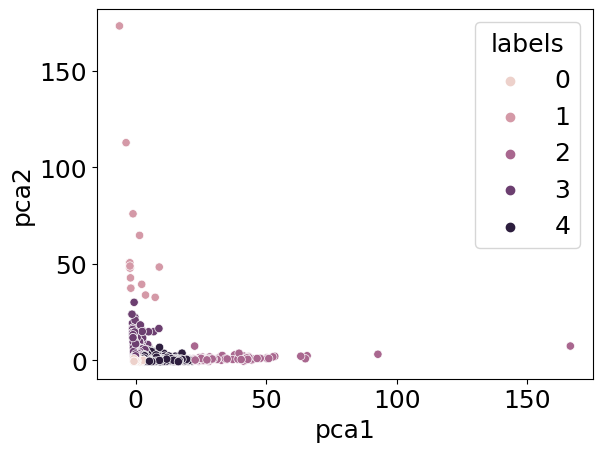

In [154]:
sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df)

In [155]:
pca_df.groupby('labels').agg('mean')

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
labels,,,,,,,,,,,
0,-0.330328,-0.260718,0.056467,0.034976,0.013035,0.015917,0.019730,-0.014566,-0.013246,0.006068,-0.003012
1,-0.500676,57.947784,-0.830680,-1.178945,-0.520148,0.032388,0.174345,0.062732,0.328076,-0.169411,0.160232
2,33.937658,0.926108,1.925550,2.303491,-1.068492,0.825092,-0.637789,0.041209,-0.601008,1.759545,-0.731659
3,-0.539009,3.825428,-0.032934,0.010752,-0.025501,-0.007206,-0.037534,-0.006644,0.031925,0.026568,-0.013956
4,5.661703,-0.103562,-1.044528,-0.713092,-0.173262,-0.306745,-0.297890,0.272174,0.220150,-0.193454,0.092305


In [156]:
dfc2 = df_2.copy()

In [157]:
dfc2['labels'] = pca_df['labels']

In [158]:
dfc2.groupby('labels').agg('mean')

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,month_1.0,month_2.0,month_9.0,month_10.0,month_11.0,...,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,max_price,min_price,mean_price
labels,,,,,,,,,,,,,,,,,,,,,
0,1.459021,1.087257,0.029846,0.008585,1.420590,0.265996,0.242857,0.051794,0.291482,0.332596,...,0.213162,0.207663,0.203957,0.206506,0.209658,0.208015,0.210060,118.874403,108.807489,113.512100
1,3.388889,1.000000,0.055556,0.055556,3.277778,0.500000,0.833333,0.166667,0.055556,0.944444,...,0.055556,1.111111,0.111111,0.833333,0.222222,0.500000,0.555556,22015.257222,10350.686111,13161.357926
2,44.402062,10.340206,3.494845,2.319588,38.587629,11.752577,5.628866,0.670103,10.505155,9.628866,...,7.061856,7.783505,8.268041,5.670103,5.422680,5.886598,4.309278,246.402887,84.962990,125.942399
3,1.353383,1.093596,0.013223,0.004926,1.335235,0.227379,0.202230,0.053409,0.293233,0.341976,...,0.214156,0.189526,0.196785,0.174229,0.194711,0.194192,0.189785,1161.719811,1081.397667,1112.940881
4,8.569942,2.037649,1.005816,0.936945,6.627181,1.773186,1.558310,0.194368,1.398531,1.870830,...,1.282216,1.292623,1.332415,1.253137,1.090909,1.098867,1.219773,161.815929,91.288861,116.522351
